###### LOG REGRESSION CLASSIFIER #####

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
happiness = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv', delimiter=',')
print('BEFORE\nRows: ', len(happiness))
print('Columns: ', len(happiness.columns))
happiness.head(3)
happiness = happiness.drop('Timestamp', axis=1) # Remove 'Timestamp' factor as it is not needed
happiness.head(3)
print('AFTER\nRows: ', len(happiness))
print('Columns: ', len(happiness.columns))

BEFORE
Rows:  15972
Columns:  24
AFTER
Rows:  15972
Columns:  23


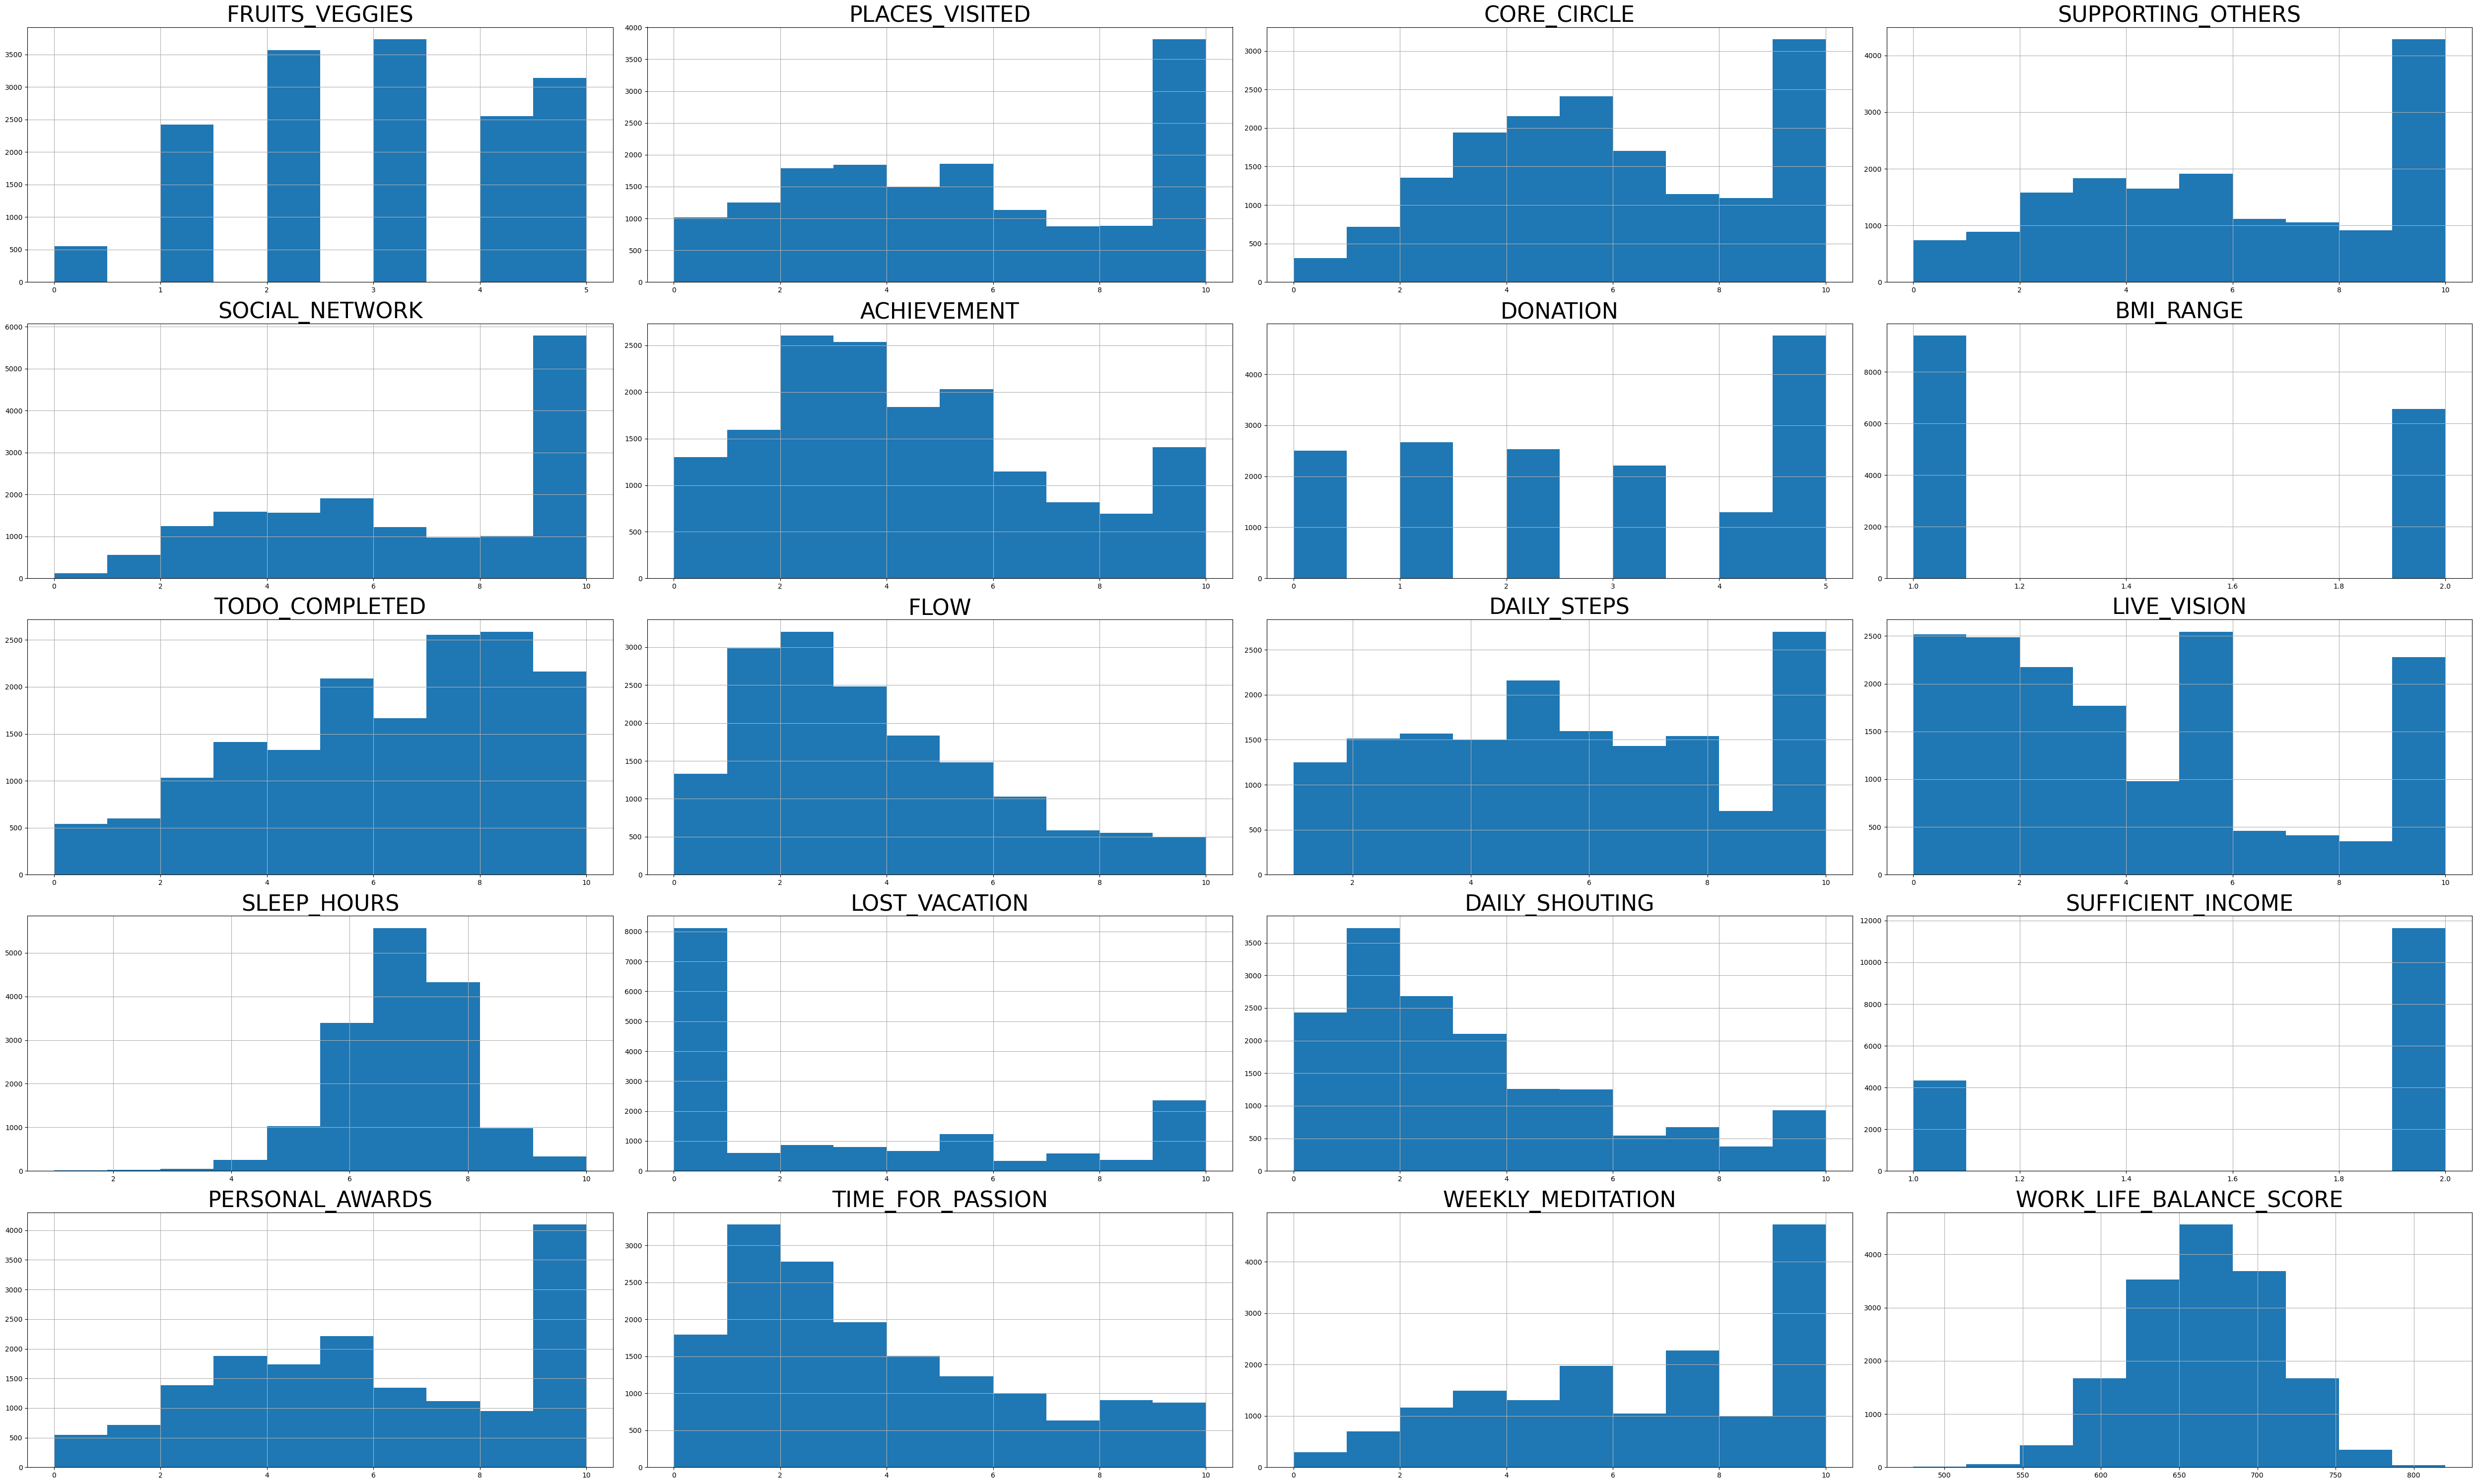

In [229]:
# Frequency distributions
fig = happiness.hist(figsize=(50, 30))
[x.title.set_size(32) for x in fig.ravel()]
plt.tight_layout()

## DAILY_STRESS not included in output
## AGE not included in output
## GENDER not included in output

### LET'S FIND OUT WHY?? ###

In [283]:
print(happiness.dtypes)
# Categorical data exists in the dataset

FRUITS_VEGGIES               int64
DAILY_STRESS                 int32
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                          int32
GENDER                       int32
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [249]:
# clear out happiness_encoded df
happiness_encoded = happiness

In [251]:
# Encode GENDER - we will use a label encoder from sklearn package
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_1 = LabelEncoder()

# Apply LabelEncoder to the 'AGE' column
happiness_encoded['GENDER'] = label_encoder_1.fit_transform(happiness['GENDER'])

# Let's take a look
# Display the mapping of categories to labels
print("Mapping of labels:")
for index, label in enumerate(label_encoder_1.classes_):
    print(f"{label} -> {index}")

Mapping of labels:
Female -> 0
Male -> 1


In [253]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns))
print(happiness_encoded.head())
print(happiness_encoded.dtypes)

Rows:  15971
Columns:  23
   FRUITS_VEGGIES DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0               3            2               2            5   
1               2            3               4            3   
2               2            3               3            4   
3               3            3              10            3   
4               5            1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                  0               5            2         0          1   
1                  8              10            5         2          2   
2                  4              10            3         2          2   
3                 10               7            2         5          2   
4                 10               4            2         4          2   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0               6  ...            7              5               5   
1         

In [255]:
# Encode DAILY_STRESS
print(happiness_encoded['DAILY_STRESS']) 
# Convert all entries of DAILY_STRESS from 'string' to type 'int'
happiness_encoded['DAILY_STRESS'] = happiness_encoded['DAILY_STRESS'].astype(int)
print(happiness_encoded['DAILY_STRESS']) 

0        2
1        3
2        3
3        3
4        1
        ..
15967    3
15968    3
15969    3
15970    1
15971    4
Name: DAILY_STRESS, Length: 15971, dtype: object
0        2
1        3
2        3
3        3
4        1
        ..
15967    3
15968    3
15969    3
15970    1
15971    4
Name: DAILY_STRESS, Length: 15971, dtype: int32


In [257]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns))
print(happiness_encoded.head())
print(happiness_encoded.dtypes)

Rows:  15971
Columns:  23
   FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0               3             2               2            5   
1               2             3               4            3   
2               2             3               3            4   
3               3             3              10            3   
4               5             1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                  0               5            2         0          1   
1                  8              10            5         2          2   
2                  4              10            3         2          2   
3                 10               7            2         5          2   
4                 10               4            2         4          2   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0               6  ...            7              5               5   
1   

In [259]:
# Encode AGE - we will use a label encoder from sklearn package
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_2 = LabelEncoder()

# Apply LabelEncoder to the 'AGE' column
happiness_encoded['AGE'] = label_encoder_2.fit_transform(happiness_encoded['AGE'])

# Let's take a look
# Display the mapping of categories to labels
print("Mapping of labels:")
for index, label in enumerate(label_encoder_2.classes_):
    print(f"{label} -> {index}")

Mapping of labels:
21 to 35 -> 0
36 to 50 -> 1
51 or more -> 2
Less than 20 -> 3


In [261]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns))
print(happiness_encoded.head())
print(happiness_encoded.dtypes)

Rows:  15971
Columns:  23
   FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
0               3             2               2            5   
1               2             3               4            3   
2               2             3               3            4   
3               3             3              10            3   
4               5             1               3            3   

   SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
0                  0               5            2         0          1   
1                  8              10            5         2          2   
2                  4              10            3         2          2   
3                 10               7            2         5          2   
4                 10               4            2         4          2   

   TODO_COMPLETED  ...  SLEEP_HOURS  LOST_VACATION  DAILY_SHOUTING  \
0               6  ...            7              5               5   
1   